<a href="https://colab.research.google.com/github/19pa1a05c7/clustering-with-kmeans/blob/master/copy_of_Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---

# TEAM MEMBERS:


1.   **sadhik**  -19PA1A05C7
2.   **jagadeesh**  -19PA1A05C3
1.   **nagaraju**  -19PA1A0591
2.   **mohana santhi**  -19PA1A05B1




# **Importing the required modules**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

# **Forming dataframes of single day and concating them to a single dataframe.**

In [2]:
d1=pd.read_csv("01-22-2020.csv")
d2=pd.read_csv("01-23-2020.csv")
d3=pd.read_csv("01-24-2020.csv")
d4=pd.read_csv("01-25-2020.csv")
d5=pd.read_csv("01-26-2020.csv")
d6=pd.read_csv("01-27-2020.csv")
d7=pd.read_csv("01-28-2020.csv")
d8=pd.read_csv("01-29-2020.csv")
d9=pd.read_csv("01-30-2020.csv")
d10=pd.read_csv("01-31-2020.csv")
d11=pd.read_csv("02-01-2020.csv")
d12=pd.read_csv("02-02-2020.csv")
d13=pd.read_csv("02-03-2020.csv")
d14=pd.read_csv("02-04-2020.csv")
d15=pd.read_csv("02-05-2020.csv")
d16=pd.read_csv("02-06-2020.csv")
d17=pd.read_csv("02-07-2020.csv")
d18=pd.read_csv("02-08-2020.csv")
d19=pd.read_csv("02-09-2020.csv")
d20=pd.read_csv("02-10-2020.csv")
d21=pd.read_csv("02-11-2020.csv")
d22=pd.read_csv("02-12-2020.csv")
d23=pd.read_csv("02-13-2020.csv")
d24=pd.read_csv("02-14-2020.csv")
d25=pd.read_csv("02-15-2020.csv")
d26=pd.read_csv("02-16-2020.csv")
d27=pd.read_csv("02-17-2020.csv")
d28=pd.read_csv("02-18-2020.csv")
d29=pd.read_csv("02-19-2020.csv")
d30=pd.read_csv("02-20-2020.csv")
d31=pd.read_csv("02-21-2020.csv")
d32=pd.read_csv("02-22-2020.csv")
d33=pd.read_csv("02-23-2020.csv")
d34=pd.read_csv("02-24-2020.csv")
d35=pd.read_csv("02-25-2020.csv")
d36=pd.read_csv("02-26-2020.csv")
d37=pd.read_csv("02-27-2020.csv")
d38=pd.read_csv("02-28-2020.csv")
d39=pd.read_csv("02-29-2020.csv")
d40=pd.read_csv("03-01-2020.csv")
d41=pd.read_csv("03-02-2020.csv")
d42=pd.read_csv("03-03-2020.csv")
d43=pd.read_csv("03-04-2020.csv")
d44=pd.read_csv("03-05-2020.csv")
d45=pd.read_csv("03-06-2020.csv")
d46=pd.read_csv("03-07-2020.csv")
d47=pd.read_csv("03-08-2020.csv")
d48=pd.read_csv("03-09-2020.csv")
d49=pd.read_csv("03-10-2020.csv")
d50=pd.read_csv("03-11-2020.csv")
d51=pd.read_csv("03-12-2020.csv")
d52=pd.read_csv("03-13-2020.csv")
d53=pd.read_csv("03-14-2020.csv")
d54=pd.read_csv("03-15-2020.csv")
d55=pd.read_csv("03-16-2020.csv")
d56=pd.read_csv("03-17-2020.csv")
d57=pd.read_csv("03-18-2020.csv")
d58=pd.read_csv("03-19-2020.csv")
d59=pd.read_csv("03-20-2020.csv")
d60=pd.read_csv("03-21-2020.csv")
d61=pd.read_csv("03-22-2020.csv")
d62=pd.read_csv("03-23-2020.csv")
d63=pd.read_csv("03-24-2020.csv")
d64=pd.read_csv("03-25-2020.csv")
d65=pd.read_csv("03-26-2020.csv")

frame=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25,d26,d27,d28,d29,d30,d31,d32,d33,d34,d35,d36,d37,d38,d39,d40,d41,d42,d43,d44,d45,d46,d47,d48,d49,d50,d51,d52,d53,d54,d56,d57,d58,d59,d60,d61,d62,d63,d64,d65]
covid=pd.concat(frame)
covid


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:68: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Deaths,FIPS,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,NaN,NaN,NaN,1.0,Mainland China,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Anhui,NaN,NaN
1,NaN,NaN,NaN,14.0,Mainland China,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Beijing,NaN,NaN
2,NaN,NaN,NaN,6.0,Mainland China,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Chongqing,NaN,NaN
3,NaN,NaN,NaN,1.0,Mainland China,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Fujian,NaN,NaN
4,NaN,NaN,NaN,NaN,Mainland China,NaN,NaN,NaN,1/22/2020 17:00,NaN,NaN,NaN,NaN,NaN,Gansu,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,92.0,NaN,Venezuela,107.0,NaN,Venezuela,0.0,NaN,NaN,2020-03-26 23:48:18,6.423800,NaN,-66.589700,NaN,NaN,NaN,15.0
3417,133.0,NaN,Vietnam,153.0,NaN,Vietnam,0.0,NaN,NaN,2020-03-26 23:48:18,14.058324,NaN,108.277199,NaN,NaN,NaN,20.0
3418,66.0,NaN,West Bank and Gaza,84.0,NaN,West Bank and Gaza,1.0,NaN,NaN,2020-03-26 23:48:18,31.952200,NaN,35.233200,NaN,NaN,NaN,17.0
3419,16.0,NaN,Zambia,16.0,NaN,Zambia,0.0,NaN,NaN,2020-03-26 23:48:18,-13.133897,NaN,27.849332,NaN,NaN,NaN,0.0


In [3]:
covid["Longitude"]=covid["Long_"]
covid["Latitude"]=covid["Lat"]
covid["Province/State"]=covid["Province_State"]
covid["Last Update"]=covid["Last_Update"]
covid["Country/Region"]=covid["Country_Region"]
covid


,Active,Admin2,Combined_Key,Confirmed,Country/Region,Country_Region,Deaths,FIPS,Last Update,Last_Update,Lat,Latitude,Long_,Longitude,Province/State,Province_State,Recovered
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3416,92.0,NaN,Venezuela,107.0,Venezuela,Venezuela,0.0,NaN,2020-03-26 23:48:18,2020-03-26 23:48:18,6.423800,6.423800,-66.589700,-66.589700,NaN,NaN,15.0
3417,133.0,NaN,Vietnam,153.0,Vietnam,Vietnam,0.0,NaN,2020-03-26 23:48:18,2020-03-26 23:48:18,14.058324,14.058324,108.277199,108.277199,NaN,NaN,20.0
3418,66.0,NaN,West Bank and Gaza,84.0,West Bank and Gaza,West Bank and Gaza,1.0,NaN,2020-03-26 23:48:18,2020-03-26 23:48:18,31.952200,31.952200,35.233200,35.233200,NaN,NaN,17.0
3419,16.0,NaN,Zambia,16.0,Zambia,Zambia,0.0,NaN,2020-03-26 23:48:18,2020-03-26 23:48:18,-13.133897,-13.133897,27.849332,27.849332,NaN,NaN,0.0


# **Cleaning the data**

In [0]:
covid["Confirmed"].fillna(covid["Confirmed"].mean(),inplace=True) 
covid["Deaths"].fillna(covid["Deaths"].mean(),inplace=True)
covid["Recovered"].fillna(covid["Recovered"].mean(),inplace=True)
covid["Province/State"].fillna(covid["Province/State"].mode()[0],inplace=True)
covid["Latitude"].fillna(covid["Latitude"].mean(),inplace=True)
covid["Longitude"].fillna(covid["Longitude"].mean(),inplace=True)

In [0]:
covid=covid.drop(["Active","Admin2","Combined_Key","Country_Region","FIPS","Last_Update","Lat","Long_","Province_State"],axis=1)

In [6]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24435 entries, 0 to 3420
Data columns (total 8 columns):
Confirmed         24435 non-null float64
Country/Region    17090 non-null object
Deaths            24435 non-null float64
Last Update       17090 non-null object
Latitude          24435 non-null float64
Longitude         24435 non-null float64
Province/State    24435 non-null object
Recovered         24435 non-null float64
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


# **Forming dataframe contributing each row to each city.**

In [7]:
covid19=covid.iloc[:,[6,4,5,0,2,7]]
covid19

,Province/State,Latitude,Longitude,Confirmed,Deaths,Recovered
0,Texas,36.968913,-83.206437,1.000000,10.643077,93.535368
1,Texas,36.968913,-83.206437,14.000000,10.643077,93.535368
2,Texas,36.968913,-83.206437,6.000000,10.643077,93.535368
3,Texas,36.968913,-83.206437,1.000000,10.643077,93.535368
4,Texas,36.968913,-83.206437,278.897403,10.643077,93.535368
...,...,...,...,...,...,...
3416,Texas,6.423800,-66.589700,107.000000,0.000000,15.000000
3417,Texas,14.058324,108.277199,153.000000,0.000000,20.000000
3418,Texas,31.952200,35.233200,84.000000,1.000000,17.000000
3419,Texas,-13.133897,27.849332,16.000000,0.000000,0.000000


In [8]:
covid19.columns

Index(['Province/State', 'Latitude', 'Longitude', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [9]:
x=covid19.iloc[:,1:6].values
x

array([[ 36.96891341, -83.20643664,   1.        ,  10.64307744,
         93.53536824],
       [ 36.96891341, -83.20643664,  14.        ,  10.64307744,
         93.53536824],
       [ 36.96891341, -83.20643664,   6.        ,  10.64307744,
         93.53536824],
       ...,
       [ 31.9522    ,  35.2332    ,  84.        ,   1.        ,
         17.        ],
       [-13.133897  ,  27.849332  ,  16.        ,   0.        ,
          0.        ],
       [-19.015438  ,  29.154857  ,   3.        ,   1.        ,
          0.        ]])

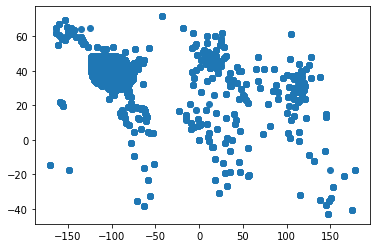

In [24]:
plt.scatter(x[:,1],x[:,0])

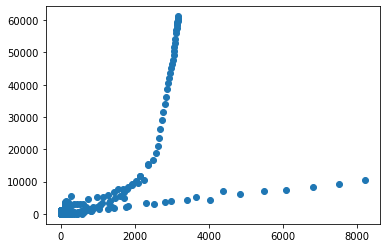

In [48]:
plt.scatter(x[:,3],x[:,4])


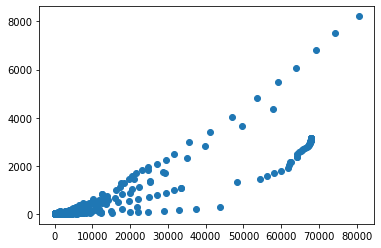

In [49]:
plt.scatter(x[:,2],x[:,3])


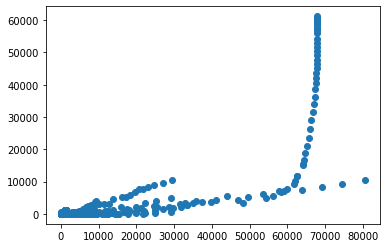

In [50]:
plt.scatter(x[:,2],x[:,4])


In [12]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
from mpl_toolkits.basemap import Basemap


Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev
0 upgraded, 1 newly installed, 0 to remove and 25 not upgraded.
Need to get 73.1 kB of archives.
After this operation, 486 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Fetched 73.1 kB in 0s (164 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 133872 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1b

     |████████████████████████████████| 2.8MB 2.8MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp36-cp36m-linux_x86_64.whl size=3702124 sha256=74dafaecc00cde88dad8c3bbcee04940da73bd75f89f74b5a4f61fc59fdcaefa
  Stored in directory: /root/.cache/pip/wheels/02/cd/b1/a2d6430f74c7a778a43d62f78bec109ca69c732dc9b929142a
Successfully built pyproj
  Found existing installation: pyproj 2.6.0
    Uninstalling pyproj-2.6.0:
      Successfully uninstalled pyproj-2.6.0


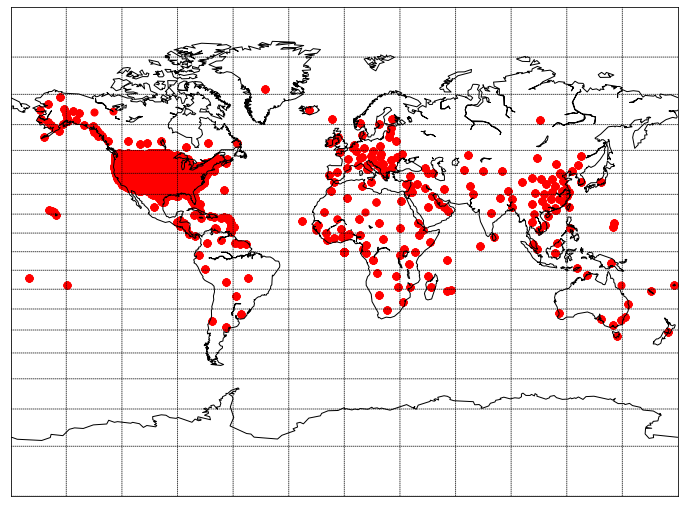

In [39]:
fig=plt.figure(figsize=(12,9))
m=Basemap(projection="mill",llcrnrlat=-90,urcrnrlat=90,llcrnrlon=-180,urcrnrlon=180,resolution="c")
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10))
m.drawmeridians(np.arange(-180,180,30))
m.scatter(x[:,1],x[:,0],latlon=True,s=50,c="red")


# **Finding optimal value of cluster through elbow method.**

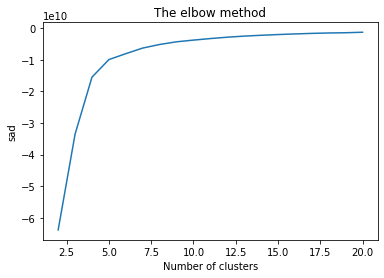

In [18]:
sad = []

for i in range(2, 21):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sad.append(kmeans.score(x))
plt.plot(range(2,21),sad)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('sad')
plt.show()


**From the graph we conclude the optimal value of cluster is 5.**

# **Clustering**

In [19]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

# **Bubble plot of five clusters in which area of each dot represents the confirmed cases**

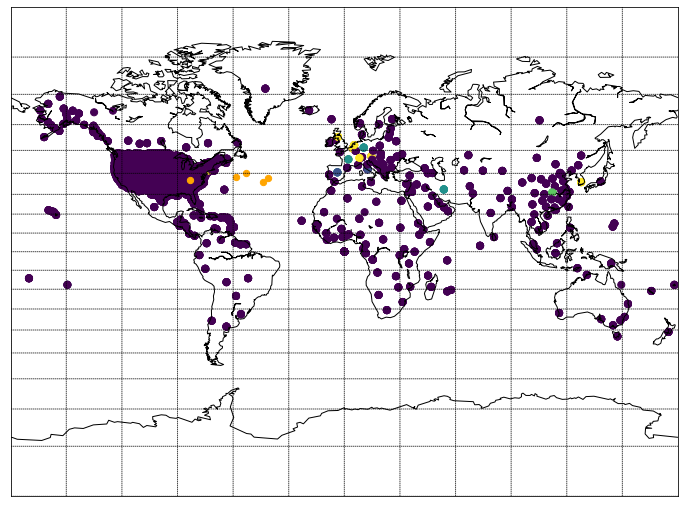

In [47]:
fig=plt.figure(figsize=(12,9))
m.drawcoastlines()
m.drawparallels(np.arange(-90,90,10))
m.drawmeridians(np.arange(-180,180,30))
m.scatter(x[:, 1], x[:, 0],s=50,latlon=True,c=np.array(y_kmeans),cmap="viridis",alpha=1)
cen=kmeans.cluster_centers_
m.scatter(cen[:,1],cen[:,0],latlon=True,c="orange",s=40,alpha=1)

**Finding the centers of five clusters.**

In [45]:
cen=kmeans.cluster_centers_
cen

array([[ 3.69554669e+01, -8.34571730e+01,  6.65292392e+01,
         9.82416377e-01,  2.10569783e+01],
       [ 3.81806303e+01, -5.86763014e+01,  6.15861538e+04,
         3.36388462e+03,  1.16538077e+04],
       [ 3.79080957e+01, -4.13530463e+01,  2.73353947e+04,
         1.27202632e+03,  3.55421053e+03],
       [ 3.57702507e+01, -4.41110093e+01,  6.76567600e+04,
         3.03312000e+03,  5.01468000e+04],
       [ 3.99777866e+01, -5.32610223e+01,  9.06375000e+03,
         2.56395833e+02,  8.66416667e+02]])